In [280]:
from __future__ import print_function

import pandas as pd 
import numpy as np 
import sklearn

# NLTK/NLP
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import nltk
from nltk import FreqDist, word_tokenize
import string, re
import urllib
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from gensim.models import word2vec
from nltk.collocations import *
import gensim

# Classifiers 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.model_selection import train_test_split


#Sampling
from imblearn.pipeline import make_pipeline, Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

import sklearn.decomposition as decomposition

#Visualization
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import warnings 
warnings.filterwarnings("ignore")

from nltk.stem.wordnet import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

In [281]:
# import customized functions
# import import_ipynb
# from custom_functions import *

%run custom_functions.ipynb

In [288]:
df = pd.read_csv('data/cleaned-reshuffled.csv')
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
df.lem_tweet= df.lem_tweet.apply(str)
df.stem_tweet= df.stem_tweet.apply(str)
df.tokenized_tweet.apply(eval)
df.stemmed_tokens.apply(eval)
df.lemmatized_tokens.apply(eval)

0        [sad, see, the, scene, hooligan, pre, engrus, why, spoil, the, pay, euro]                                                                 
1        [gooddyeyoung, yoyoyo, super, happy, apa, the, movement]                                                                                  
2        [queen, evil, bihday, lnic, lnicjustanevilbday, bihday, suit, evil, love, yolo, stoop, seriously]                                         
3        [you, might, libtard, libtard, sjw, liberal, politics]                                                                                    
4        [what, are, your, goal, find, out, here, smile]                                                                                           
5        [retweets, nuascannan]                                                                                                                    
6        [classic, trump, follower]                                                                             

## Train / Test Split for TF-IDF

In [289]:
X = df.drop(['label'], axis = 1)

In [290]:
y = df['label']

In [291]:
#splitting into train and test 
X_model, X_test, y_model, y_test = train_test_split(X, y, stratify = y,  test_size=0.20, random_state=123)

#splitting "model" into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_model, y_model, test_size=0.20, random_state=123)

# df_train_full = X_train.copy()
# df_train_full['label']= y_train
# train_full_df.to_csv('train_full_df.csv')

In [292]:
y.value_counts(normalize=True)

0    0.929854
1    0.070146
Name: label, dtype: float64

### Upsampling and Downsampling Training Data

In [293]:
upsample_training_data(X_train, y_train)

,id,tweet,tidy_tweet,no_hash_tweet,tokenized_tweet,stemmed_tokens,lemmatized_tokens,lem_tweet,stem_tweet,label
565,20676,@user f*** this ð¦ðº government that deliberately toures #refugees. we just had a coronial inquest into #hamid's death &amp; busiâ¦,this government that deliberately toures #refugees just had coronial inquest into #hamid death amp busi,this government that deliberately toures refugees just had coronial inquest into hamid death amp busi,"['this', 'government', 'that', 'deliberately', 'toures', 'refugees', 'just', 'had', 'coronial', 'inquest', 'into', 'hamid', 'death', 'amp', 'busi']","['this', 'govern', 'that', 'deliber', 'tour', 'refuge', 'just', 'had', 'coroni', 'inquest', 'into', 'hamid', 'death', 'amp', 'busi']","['this', 'government', 'that', 'deliberately', 'toures', 'refugee', 'just', 'had', 'coronial', 'inquest', 'into', 'hamid', 'death', 'amp', 'busi']",this government that deliberately toures refugees just had coronial inquest into hamid death amp busi,this government that deliberately toures refugees just had coronial inquest into hamid death amp busi,1
21531,24025,despite a demoralizing 2016: may ur #newyear2017 be / / #classism -free and #saga positive #newyearseve,despite demoralizing may #newyear #classism free and #saga positive #newyearseve,despite demoralizing may newyear classism free and saga positive newyearseve,"['despite', 'demoralizing', 'may', 'newyear', 'classism', 'free', 'and', 'saga', 'positive', 'newyearseve']","['despit', 'demor', 'may', 'newyear', 'classism', 'free', 'and', 'saga', 'posit', 'newyearsev']","['despite', 'demoralizing', 'may', 'newyear', 'classism', 'free', 'and', 'saga', 'positive', 'newyearseve']",despite demoralizing may newyear classism free and saga positive newyearseve,despite demoralizing may newyear classism free and saga positive newyearsev,1
13300,18145,"@user #koreans &amp; joseon people in japan, will abuse the for claims of own rights by rough demo.",#koreans amp joseon people japan will abuse the for claims own rights rough demo,koreans amp joseon people japan will abuse the for claims own rights rough demo,"['koreans', 'amp', 'joseon', 'people', 'japan', 'will', 'abuse', 'the', 'for', 'claims', 'own', 'rights', 'rough', 'demo']","['korean', 'amp', 'joseon', 'peopl', 'japan', 'will', 'abus', 'the', 'for', 'claim', 'own', 'right', 'rough', 'demo']","['korean', 'amp', 'joseon', 'people', 'japan', 'will', 'abuse', 'the', 'for', 'claim', 'own', 'right', 'rough', 'demo']",koreans amp joseon people japan will abuse the for claims own rights rough demo,koreans amp joseon people japan will abuse the for claims own rights rough demo,1
18925,8506,@user @user @user @user classic ! yet you jewish bastards wonder why you are sooo hated in the world.,classic yet you jewish bastards wonder why you are sooo hated the world,classic yet you jewish bastards wonder why you are sooo hated the world,"['classic', 'yet', 'you', 'jewish', 'bastards', 'wonder', 'why', 'you', 'are', 'sooo', 'hated', 'the', 'world']","['classic', 'yet', 'you', 'jewish', 'bastard', 'wonder', 'whi', 'you', 'are', 'sooo', 'hate', 'the', 'world']","['classic', 'yet', 'you', 'jewish', 'bastard', 'wonder', 'why', 'you', 'are', 'sooo', 'hated', 'the', 'world']",classic yet you jewish bastards wonder why you are sooo hated the world,classic yet you jewish bastards wonder why you are sooo hated the world,1
12619,15464,@user did someone say #antisemetic ? gee (((@user you're a bit triggered eh?,did someone say #antisemetic gee you bit triggered,did someone say antisemetic gee you bit triggered,"['did', 'someone', 'say', 'antisemetic', 'gee', 'you', 'bit', 'triggered']","['did', 'someon', 'say', 'antisemet', 'gee', 'you', 'bit', 'trigger']","['did', 'someone', 'say', 'antisemetic', 'gee', 'you', 'bit', 'triggered']",did someone say antisemetic gee you bit triggered,did someone say antisemetic gee you bit trigg,1
26964,28937,couldn't have said this any better nor truthfully donny boy. @user #theresist

In [294]:
train_upsampled = upsample_training_data(X_train, y_train)

X_train_up = train_upsampled.drop(['label'], axis = 1)
y_train_up = pd.DataFrame(train_upsampled.label)

In [295]:
train_upsampled['label'].value_counts()

1    18991
0    18991
Name: label, dtype: int64

In [296]:
train_downsampled = downsample_training_data(X_train, y_train)

X_train_down = train_downsampled.drop(['label'], axis = 1)
y_train_down = pd.DataFrame(train_downsampled.label)

In [297]:
train_downsampled['label'].value_counts()

1    1464
0    1464
Name: label, dtype: int64

## Comparing Vectorization and Method Performance

In [298]:
count_vect = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer(min_df=.001)
tfidf_ngram = TfidfVectorizer(ngram_range=(1,2), min_df=.001)
tfidf_ngram2 = TfidfVectorizer(ngram_range=(2,3),min_df=.001)

logreg = LogisticRegression()
rfc = RandomForestClassifier(random_state=10)
nb = GaussianNB()
svc = SVC(random_state=10)

vectorization_list = [('COUNT_VECTORIZER', count_vect),
                      ('TFIDF_VECTORIZER', tfidf_vectorizer),
                      ('TFIDF_NGRAM_1_2', tfidf_ngram),
                      ('TFIDF_NGRAM_2_3', tfidf_ngram2)]



In [299]:
%run custom_functions.ipynb

## Naive Bayes

In [14]:
np.random.seed(0)

In [15]:
NB_compare_vectorization_model(X_train.lem_tweet, y_train, 
                                   X_val.lem_tweet, y_val, GaussianNB())

The performance of the COUNT_VECTORIZER is:
Train Accuracy: 0.93
Train Precision: 0.51
Train Recall: 1.0
Train F1: 0.68


Validation Accuracy: 0.85
Validation Precision: 0.24
Validation Recall: 0.63
The performance of the COUNT_VECTORIZER is:
Train Accuracy: 0.93
Train Precision: 0.51
Train Recall: 1.0
Train F1: 0.68


Validation Accuracy: 0.85
Validation Precision: 0.24
Validation Recall: 0.63
Validation F1: 0.34


Validation F1: 0.34


The performance of the TFIDF_VECTORIZER is:
Train Accuracy: 0.6
Train Precision: 0.15
Train Recall: 1.0
Train F1: 0.26


Validation Accuracy: 0.58
Validation Precision: 0.12
Validation Recall: 0.88
Validation F1: 0.21


The performance of the TFIDF_VECTORIZER is:
Train Accuracy: 0.6
Train Precision: 0.15
Train Recall: 1.0
Train F1: 0.26


Validation Accuracy: 0.58
Validation Precision: 0.12
Validation Recall: 0.88
Validation F1: 0.21


The performance of the TFIDF_NGRAM_1_2 is:
Train Accuracy: 0.62
Train Precision: 0.16
Train Recall: 1.0
Train F1: 0.28

{'COUNT_VECTORIZER': {'Train Accuracy': 0.9324370569542899,
  'Train Precision': 0.5144061841180604,
  'Train Recall': 1.0,
  'Train F1': 0.6793503480278421,
  'Validation Accuracy': 0.8461087211576066,
  'Validation Precision': 0.23765786452353616,
  'Validation Recall': 0.6272727272727273,
  'Validation F1': 0.3447127393838468},
 'TFIDF_VECTORIZER': {'Train Accuracy': 0.6011733072598386,
  'Train Precision': 0.15215131989191436,
  'Train Recall': 1.0,
  'Train F1': 0.26411690420349987,
  'Validation Accuracy': 0.5803676183026985,
  'Validation Precision': 0.12166666666666667,
  'Validation Recall': 0.8848484848484849,
  'Validation F1': 0.21391941391941394},
 'TFIDF_NGRAM_1_2': {'Train Accuracy': 0.6244927890491322,
  'Train Precision': 0.1600874794969929,
  'Train Recall': 1.0,
  'Train F1': 0.2759920821943633,
  'Validation Accuracy': 0.6018771998435667,
  'Validation Precision': 0.12783595113438045,
  'Validation Recall': 0.8878787878787879,
  'Validation F1': 0.22349351639969486}

{'COUNT_VECTORIZER': {'Train Accuracy': 0.9324370569542899,
  'Train Precision': 0.5144061841180604,
  'Train Recall': 1.0,
  'Train F1': 0.6793503480278421,
  'Validation Accuracy': 0.8461087211576066,
  'Validation Precision': 0.23765786452353616,
  'Validation Recall': 0.6272727272727273,
  'Validation F1': 0.3447127393838468},
 'TFIDF_VECTORIZER': {'Train Accuracy': 0.6011733072598386,
  'Train Precision': 0.15215131989191436,
  'Train Recall': 1.0,
  'Train F1': 0.26411690420349987,
  'Validation Accuracy': 0.5803676183026985,
  'Validation Precision': 0.12166666666666667,
  'Validation Recall': 0.8848484848484849,
  'Validation F1': 0.21391941391941394},
 'TFIDF_NGRAM_1_2': {'Train Accuracy': 0.6244927890491322,
  'Train Precision': 0.1600874794969929,
  'Train Recall': 1.0,
  'Train F1': 0.2759920821943633,
  'Validation Accuracy': 0.6018771998435667,
  'Validation Precision': 0.12783595113438045,
  'Validation Recall': 0.8878787878787879,
  'Validation F1': 0.22349351639969486}

## Logistic Regression

In [300]:
SMOTE_vector_model(X_train.lem_tweet, y_train, X_val.lem_tweet, y_val, tfidf_vectorizer, logreg)

Train Accuracy: 0.89
Train Precision: 0.38
Train Recall: 0.85
Train F1: 0.53


Validation Accuracy: 0.88
Validation Precision: 0.31
Validation Recall: 0.73
Validation F1: 0.43


Predicted,0,1,All
Actual,,,
0,4243,541,4784
1,89,241,330
All,4332,782,5114


In [301]:
%run custom_functions.ipynb

In [302]:
#Logistic Regression: compare vectorizers with class weight balances + lemmatizing
LR_cw_lemm = compare_vectorization_model(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            LogisticRegression(class_weight='balanced', solver = 'lbfgs'))

In [303]:
pd.DataFrame(LR_cw_lemm)

,COUNT_VECTORIZER,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_2_3
Train Accuracy,0.99,0.89,0.89,0.41
Train F1,0.92,0.54,0.56,0.19
Train Precision,0.86,0.38,0.40,0.10
Train Recall,1.00,0.92,0.93,0.94
Validation Accuracy,0.95,0.87,0.88,0.38
Validation F1,0.64,0.43,0.44,0.16
Validation Precision,0.60,0.30,0.31,0.09
Validation Recall,0.69,0.77,0.77,0.89


In [304]:
#Logistic Regression: compare vectorizers with SMOTE + lemmatizing
LR_smote_lemm = SMOTE_compare_vectorization_model(X_train.lem_tweet, y_train, X_val.lem_tweet, 
                                    y_val, LogisticRegression(class_weight='balanced', solver= 'lbfgs'))

In [305]:
LR_smote_lemm 

{'COUNT_VECTORIZER': {'Train Accuracy': 0.99,
  'Train Precision': 0.86,
  'Train Recall': 1.0,
  'Train F1': 0.92,
  'Validation Accuracy': 0.95,
  'Validation Precision': 0.6,
  'Validation Recall': 0.69,
  'Validation F1': 0.64},
 'TFIDF_VECTORIZER': {'Train Accuracy': 0.89,
  'Train Precision': 0.38,
  'Train Recall': 0.92,
  'Train F1': 0.54,
  'Validation Accuracy': 0.87,
  'Validation Precision': 0.3,
  'Validation Recall': 0.77,
  'Validation F1': 0.43},
 'TFIDF_NGRAM_1_2': {'Train Accuracy': 0.89,
  'Train Precision': 0.4,
  'Train Recall': 0.93,
  'Train F1': 0.56,
  'Validation Accuracy': 0.88,
  'Validation Precision': 0.31,
  'Validation Recall': 0.77,
  'Validation F1': 0.44},
 'TFIDF_NGRAM_2_3': {'Train Accuracy': 0.41,
  'Train Precision': 0.1,
  'Train Recall': 0.94,
  'Train F1': 0.19,
  'Validation Accuracy': 0.38,
  'Validation Precision': 0.09,
  'Validation Recall': 0.89,
  'Validation F1': 0.16}}

In [543]:
#Logistic Regression: compare vectorizers with upsampling + lemmatizing
dic = compare_vectorization_model(X_train_up.lem_tweet, y_train_up, X_val.lem_tweet, y_val, 
                                   LogisticRegression(class_weight='balanced', solver='lbfgs'))

In [307]:
#Logistic Regression: compare vectorizers using stemming + class balances
pd.DataFrame(compare_vectorization_model(X_train.stem_tweet, y_train, X_val.stem_tweet, 
                                    y_val, LogisticRegression(class_weight='balanced', solver='lbfgs')))

,COUNT_VECTORIZER,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_2_3
Train Accuracy,0.99,0.88,0.89,0.40
Train F1,0.92,0.53,0.54,0.18
Train Precision,0.86,0.37,0.39,0.10
Train Recall,1.00,0.91,0.92,0.94
Validation Accuracy,0.95,0.87,0.87,0.37
Validation F1,0.65,0.43,0.44,0.15
Validation Precision,0.60,0.30,0.31,0.08
Validation Recall,0.69,0.75,0.76,0.90


In [544]:
download_dir = "results/" #where you want the file to be downloaded to 

csv = open(download_dir, "w") 
#"w" indicates that you're writing strings to the file

columnTitleRow = "Logistic Regression: Class Weight Balanced + Stemming\n"
csv.write(columnTitleRow)

for key in dic.keys():
	name = key
	email = dic[key]
	row = name + "," + email + "\n"
	csv.write(row)

FileNotFoundError: [Errno 2] No such file or directory: 'results/logreg_cwb_stem.csv'

##### Regularization:

- Count Vectorizer:   

l2 (default), no alpha tuning: F1: 0.99, 0.66
C = .1:  .91,  .52
C = .2:  .96,  .57
C = .3:  .98,  .58
C = .01:  .67,  .39
C = .001:  .62, .39

In [308]:
single_vector_model(X_train_up.lem_tweet, y_train_up, X_val.lem_tweet, y_val, count_vect, 
                   LogisticRegression(penalty = 'l1', C = .1,  class_weight='balanced'))

Train Accuracy: 0.92
Train Precision: 0.92
Train Recall: 0.91
Train F1: 0.92


Validation Accuracy: 0.91
Validation Precision: 0.39
Validation Recall: 0.71
Validation F1: 0.5


Predicted,0,1,All
Actual,,,
0,4420,364,4784
1,96,234,330
All,4516,598,5114


In [309]:
X_train_countvect =  count_vect.fit_transform(X_train_up.lem_tweet)
X_val_countvect =  count_vect.transform(X_val.lem_tweet)

In [310]:
log = LogisticRegression(class_weight='balanced', penalty = 'l1', C = .001)

In [540]:
model_log = logreg.fit(X_train_countvect, y_train_up)

In [523]:
y_val_pred

(5114,)

In [312]:
y_val_predict = logreg.predict(X_val_countvect)

In [313]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

AUC: 0.9279587260565522


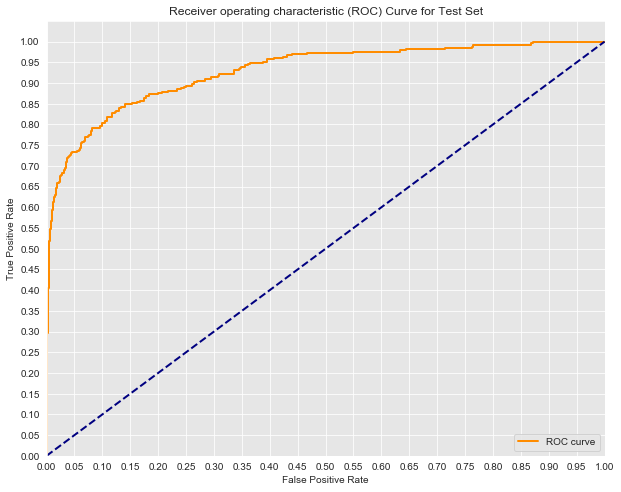

In [541]:
import seaborn as sns

y_score = model_log.decision_function(X_val_countvect)
   
fpr, tpr, thresholds = roc_curve(y_val, y_score)
y_train_score = model_log.decision_function(X_train_countvect)
train_fpr, train_tpr, thresholds = roc_curve(y_train_up, y_train_score)
#Seaborns Beautiful Styling
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Test Set')
plt.legend(loc="lower right")
print('AUC: {}'.format(auc(fpr, tpr)))
plt.show()

In [314]:
from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve
average_precision = average_precision_score(y_val, y_val_predict)

print('Average precision-recall score RF: {}'.format(average_precision))

Average precision-recall score RF: 0.441985419742557


In [317]:
pd.DataFrame(confusion_matrix(y_val, y_val_predict), index = ['actual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])

,predicted 0,predicted 1
actual 0,4645,139
actual 1,105,225


In [535]:
predicts = []
for item in logreg.predict_proba(X_val_countvect):
    if item[0] <= .70:
        predicts.append(1)
    else:
        predicts.append(0)

In [536]:
#with threshhold adjustment
pd.DataFrame(confusion_matrix(y_val, predicts), index = ['actual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])

,predicted 0,predicted 1
actual 0,4500,284
actual 1,86,244


In [527]:
y_val_predict_prob = logreg.predict_proba(X_val_countvect)

y_val_predict_prob

array([[0.80063319, 0.19936681],
       [0.91615617, 0.08384383],
       [0.98726632, 0.01273368],
       ...,
       [0.1624328 , 0.8375672 ],
       [0.84233318, 0.15766682],
       [0.99412208, 0.00587792]])

In [525]:
pred_df = pd.DataFrame(y_val_predict_prob)

In [526]:
pred_df

,0,1
0,0.800633,0.199367
1,0.916156,0.083844
2,0.987266,0.012734
3,0.829471,0.170529
4,0.992763,0.007237
5,0.991145,0.008855
6,0.912581,0.087419
7,0.973844,0.026156
8,0.849271,0.150729
9,0.974376,0.025624


In [489]:
pred_df2=pd.DataFrame(y_val)
pred_df2 = pred_df.reset_index(drop=True)
pred_df2.head()

,0,1,actual_label,actual label,predicted label
0,0.800633,0.199367,NaN,0,0
1,0.916156,0.083844,NaN,0,0
2,0.987266,0.012734,NaN,0,0
3,0.829471,0.170529,NaN,0,0
4,0.992763,0.007237,NaN,0,0


In [493]:
# pred_df['predicted label'] = y_val_predict
# pred_df.drop(['actual_label'], axis=1, inplace=True)


KeyError: "['actual_label'] not found in axis"

In [520]:
pred_df[pred_df['actual label'] != pred_df['predicted label']]

,0,1,actual label,predicted label
8,0.849271,0.150729,1,0
15,0.600299,0.399701,1,0
55,0.933399,0.066601,1,0
82,0.817364,0.182636,1,0
110,0.912235,0.087765,1,0
117,0.936663,0.063337,1,0
119,0.857751,0.142249,1,0
146,0.487135,0.512865,0,1
154,0.459536,0.540464,0,1
161,0.999240,0.000760,1,0


In [518]:
df.tidy_tweet

0        sad see the scenes hooligans pre #engrus why spoil the pay #euro                                                            
1        #gooddyeyoung #yoyoyo super happy apa the movement                                                                          
2        queen evil bihday #lnic #lnicjustanevilbday #bihday #suit #evil #love #yolo #stoops #seriously                              
3        you might libtard #libtard #sjw #liberal #politics                                                                          
4        what are your goals find out here #smile                                                                                    
5        retweets #nuascannan                                                                                                        
6        classic trump follower                                                                                                      
7        the mixture emotions here one from the weekend thx #p

## SVM


In [236]:
#class weight = balanced + lemmatized
compare_vectorization_model(X_train.lem_tweet, y_train, X_val.lem_tweet, y_val, 
                                   SVC(class_weight ='balanced', gamma='auto', ))

{'COUNT_VECTORIZER': {'Train Accuracy': 0.07,
  'Train Precision': 0.07,
  'Train Recall': 1.0,
  'Train F1': 0.13,
  'Validation Accuracy': 0.06,
  'Validation Precision': 0.06,
  'Validation Recall': 1.0,
  'Validation F1': 0.12},
 'TFIDF_VECTORIZER': {'Train Accuracy': 0.2,
  'Train Precision': 0.08,
  'Train Recall': 1.0,
  'Train F1': 0.15,
  'Validation Accuracy': 0.19,
  'Validation Precision': 0.07,
  'Validation Recall': 1.0,
  'Validation F1': 0.14},
 'TFIDF_NGRAM_1_2': {'Train Accuracy': 0.07,
  'Train Precision': 0.07,
  'Train Recall': 1.0,
  'Train F1': 0.13,
  'Validation Accuracy': 0.07,
  'Validation Precision': 0.06,
  'Validation Recall': 1.0,
  'Validation F1': 0.12},
 'TFIDF_NGRAM_2_3': {'Train Accuracy': 0.93,
  'Train Precision': 1.0,
  'Train Recall': 0.05,
  'Train F1': 0.1,
  'Validation Accuracy': 0.94,
  'Validation Precision': 1.0,
  'Validation Recall': 0.05,
  'Validation F1': 0.09}}

In [238]:
#upsampling + lemmatized
compare_vectorization_model(X_train_up.lem_tweet, y_train_up, X_val.lem_tweet, y_val, 
                                   SVC(class_weight ='balanced', gamma ='auto'))

{'COUNT_VECTORIZER': {'Train Accuracy': 0.71,
  'Train Precision': 0.64,
  'Train Recall': 0.97,
  'Train F1': 0.77,
  'Validation Accuracy': 0.47,
  'Validation Precision': 0.11,
  'Validation Recall': 0.96,
  'Validation F1': 0.19},
 'TFIDF_VECTORIZER': {'Train Accuracy': 0.84,
  'Train Precision': 0.91,
  'Train Recall': 0.75,
  'Train F1': 0.82,
  'Validation Accuracy': 0.91,
  'Validation Precision': 0.38,
  'Validation Recall': 0.67,
  'Validation F1': 0.48},
 'TFIDF_NGRAM_1_2': {'Train Accuracy': 0.79,
  'Train Precision': 0.95,
  'Train Recall': 0.61,
  'Train F1': 0.74,
  'Validation Accuracy': 0.94,
  'Validation Precision': 0.54,
  'Validation Recall': 0.52,
  'Validation F1': 0.53},
 'TFIDF_NGRAM_2_3': {'Train Accuracy': 0.55,
  'Train Precision': 1.0,
  'Train Recall': 0.09,
  'Train F1': 0.17,
  'Validation Accuracy': 0.94,
  'Validation Precision': 1.0,
  'Validation Recall': 0.08,
  'Validation F1': 0.16}}

In [239]:
#SMOTE + lemmatized 
SMOTE_compare_vectorization_model(X_train.lem_tweet, y_train, X_val.lem_tweet, 
                                    y_val, SVC(class_weight ='balanced', gamma='auto', ))

{'COUNT_VECTORIZER': {'Train Accuracy': 0.07,
  'Train Precision': 0.07,
  'Train Recall': 1.0,
  'Train F1': 0.13,
  'Validation Accuracy': 0.06,
  'Validation Precision': 0.06,
  'Validation Recall': 1.0,
  'Validation F1': 0.12},
 'TFIDF_VECTORIZER': {'Train Accuracy': 0.2,
  'Train Precision': 0.08,
  'Train Recall': 1.0,
  'Train F1': 0.15,
  'Validation Accuracy': 0.19,
  'Validation Precision': 0.07,
  'Validation Recall': 1.0,
  'Validation F1': 0.14},
 'TFIDF_NGRAM_1_2': {'Train Accuracy': 0.07,
  'Train Precision': 0.07,
  'Train Recall': 1.0,
  'Train F1': 0.13,
  'Validation Accuracy': 0.07,
  'Validation Precision': 0.06,
  'Validation Recall': 1.0,
  'Validation F1': 0.12},
 'TFIDF_NGRAM_2_3': {'Train Accuracy': 0.93,
  'Train Precision': 1.0,
  'Train Recall': 0.05,
  'Train F1': 0.1,
  'Validation Accuracy': 0.94,
  'Validation Precision': 1.0,
  'Validation Recall': 0.05,
  'Validation F1': 0.09}}

#### Grid Searching:

In [ ]:
X_train_tfid2 =  tfidf_ngram2.fit_transform(X_train_up.lemmatized_tweet)
X_val_tfid2 =  tfidf_ngram2.transform(X_val.lemmatized_tweet)

In [ ]:
# svc = SVC(kernel='linear', C=1, gamma=1, class_weight ='balanced')

params = {
'C': [0.1,.2, .3, 0.8,1,1.2,1.4],
'kernel':['linear', 'rbf'],
'gamma' :[0.1,0.8,1,1.2,1.4]
}

svm_gs= GridSearchCV(svc, param_grid = params, cv = 3)

scores = ['f1','accuracy','recall']

In [ ]:
svm_gs.fit(X_train_tfid2, y_train_up)

In [ ]:
svm_gs.best_estimator_

In [ ]:
single_vector_model()

In [ ]:
compare_vectorization_model(X_train_up.lemmatized_tweet, y_train_up, X_val.lemmatized_tweet, y_val, 
                                   SVC(C=1.2, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1.4, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False))

# Random Forest

### Compare Multiple Methods:

In [322]:
np.random.seed(0)

In [323]:
# Random Forest: compare vectorizers with class weight balances + lemmatizing 
pd.DataFrame(compare_vectorization_model(X_train.lem_tweet, y_train, X_val.lem_tweet, y_val, 
                                   RandomForestClassifier(max_depth= 20, 
                                   n_estimators = 100, class_weight='balanced', random_state=10)))

,COUNT_VECTORIZER,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_2_3
Train Accuracy,0.96,0.93,0.94,0.33
Train F1,0.71,0.61,0.62,0.17
Train Precision,0.67,0.53,0.53,0.09
Train Recall,0.76,0.72,0.72,0.97
Validation Accuracy,0.94,0.91,0.91,0.30
Validation F1,0.57,0.46,0.45,0.15
Validation Precision,0.52,0.38,0.37,0.08
Validation Recall,0.62,0.58,0.59,0.94


In [326]:
# Random Forest: compare vectorizers with upsampling + lemmatizing 
compare_vectorization_model(X_train_up.lem_tweet, y_train_up, X_val.lem_tweet, y_val, 
                                   RandomForestClassifier(max_depth= 20,
                                   n_estimators = 100, class_weight='balanced', random_state=10))

{'COUNT_VECTORIZER': {'Train Accuracy': 0.87,
  'Train Precision': 0.94,
  'Train Recall': 0.79,
  'Train F1': 0.86,
  'Validation Accuracy': 0.92,
  'Validation Precision': 0.41,
  'Validation Recall': 0.65,
  'Validation F1': 0.5},
 'TFIDF_VECTORIZER': {'Train Accuracy': 0.82,
  'Train Precision': 0.94,
  'Train Recall': 0.68,
  'Train F1': 0.79,
  'Validation Accuracy': 0.92,
  'Validation Precision': 0.41,
  'Validation Recall': 0.6,
  'Validation F1': 0.49},
 'TFIDF_NGRAM_1_2': {'Train Accuracy': 0.82,
  'Train Precision': 0.94,
  'Train Recall': 0.69,
  'Train F1': 0.8,
  'Validation Accuracy': 0.93,
  'Validation Precision': 0.45,
  'Validation Recall': 0.6,
  'Validation F1': 0.51},
 'TFIDF_NGRAM_2_3': {'Train Accuracy': 0.62,
  'Train Precision': 0.96,
  'Train Recall': 0.26,
  'Train F1': 0.41,
  'Validation Accuracy': 0.94,
  'Validation Precision': 0.63,
  'Validation Recall': 0.21,
  'Validation F1': 0.31}}

In [328]:
# Random Forest: compare vectorizers with SMOTE + lemmatizing  
SMOTE_compare_vectorization_model(X_train.lem_tweet, y_train, X_val.lem_tweet, y_val, 
                                   RandomForestClassifier(max_depth= 20,
                                   n_estimators = 100, class_weight = 'balanced', random_state=10))

{'COUNT_VECTORIZER': {'Train Accuracy': 0.96,
  'Train Precision': 0.67,
  'Train Recall': 0.76,
  'Train F1': 0.71,
  'Validation Accuracy': 0.94,
  'Validation Precision': 0.52,
  'Validation Recall': 0.62,
  'Validation F1': 0.57},
 'TFIDF_VECTORIZER': {'Train Accuracy': 0.93,
  'Train Precision': 0.53,
  'Train Recall': 0.72,
  'Train F1': 0.61,
  'Validation Accuracy': 0.91,
  'Validation Precision': 0.38,
  'Validation Recall': 0.58,
  'Validation F1': 0.46},
 'TFIDF_NGRAM_1_2': {'Train Accuracy': 0.94,
  'Train Precision': 0.53,
  'Train Recall': 0.72,
  'Train F1': 0.62,
  'Validation Accuracy': 0.91,
  'Validation Precision': 0.37,
  'Validation Recall': 0.59,
  'Validation F1': 0.45},
 'TFIDF_NGRAM_2_3': {'Train Accuracy': 0.33,
  'Train Precision': 0.09,
  'Train Recall': 0.97,
  'Train F1': 0.17,
  'Validation Accuracy': 0.3,
  'Validation Precision': 0.08,
  'Validation Recall': 0.94,
  'Validation F1': 0.15}}

In [330]:
# Random Forest: compare vectorizers with upsampling + stemming
compare_vectorization_model(X_train.stem_tweet, y_train, X_val.stem_tweet, y_val, 
                                   RandomForestClassifier(max_depth= 20,
                                   n_estimators = 100, class_weight='balanced', random_state=10))

{'COUNT_VECTORIZER': {'Train Accuracy': 0.95,
  'Train Precision': 0.62,
  'Train Recall': 0.76,
  'Train F1': 0.69,
  'Validation Accuracy': 0.93,
  'Validation Precision': 0.49,
  'Validation Recall': 0.61,
  'Validation F1': 0.54},
 'TFIDF_VECTORIZER': {'Train Accuracy': 0.94,
  'Train Precision': 0.56,
  'Train Recall': 0.71,
  'Train F1': 0.63,
  'Validation Accuracy': 0.92,
  'Validation Precision': 0.4,
  'Validation Recall': 0.57,
  'Validation F1': 0.47},
 'TFIDF_NGRAM_1_2': {'Train Accuracy': 0.93,
  'Train Precision': 0.52,
  'Train Recall': 0.71,
  'Train F1': 0.6,
  'Validation Accuracy': 0.91,
  'Validation Precision': 0.38,
  'Validation Recall': 0.58,
  'Validation F1': 0.46},
 'TFIDF_NGRAM_2_3': {'Train Accuracy': 0.33,
  'Train Precision': 0.09,
  'Train Recall': 0.96,
  'Train F1': 0.17,
  'Validation Accuracy': 0.3,
  'Validation Precision': 0.08,
  'Validation Recall': 0.93,
  'Validation F1': 0.15}}

#### Random Forest Fine-Tuning Hyperparameters: Max depth 10.... regularization??

In [333]:
# Random Forest: compare vectorizers with upsampling + lemmatizing 
compare_vectorization_model(X_train_up.lem_tweet, y_train_up, X_val.lem_tweet, y_val, 
                                   RandomForestClassifier(max_depth= 10,
                                   n_estimators = 100, class_weight='balanced', random_state=10))

{'COUNT_VECTORIZER': {'Train Accuracy': 0.84,
  'Train Precision': 0.91,
  'Train Recall': 0.76,
  'Train F1': 0.83,
  'Validation Accuracy': 0.9,
  'Validation Precision': 0.36,
  'Validation Recall': 0.67,
  'Validation F1': 0.46},
 'TFIDF_VECTORIZER': {'Train Accuracy': 0.79,
  'Train Precision': 0.91,
  'Train Recall': 0.65,
  'Train F1': 0.76,
  'Validation Accuracy': 0.9,
  'Validation Precision': 0.36,
  'Validation Recall': 0.61,
  'Validation F1': 0.45},
 'TFIDF_NGRAM_1_2': {'Train Accuracy': 0.79,
  'Train Precision': 0.91,
  'Train Recall': 0.64,
  'Train F1': 0.75,
  'Validation Accuracy': 0.91,
  'Validation Precision': 0.37,
  'Validation Recall': 0.59,
  'Validation F1': 0.45},
 'TFIDF_NGRAM_2_3': {'Train Accuracy': 0.59,
  'Train Precision': 0.97,
  'Train Recall': 0.19,
  'Train F1': 0.32,
  'Validation Accuracy': 0.94,
  'Validation Precision': 0.69,
  'Validation Recall': 0.16,
  'Validation F1': 0.26}}

In [337]:
pd.DataFrame(compare_vectorization_model(X_train_up.lem_tweet, y_train_up, X_val.lem_tweet, y_val, 
                                   RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=200, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=10, verbose=0, warm_start=False)))

,COUNT_VECTORIZER,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_2_3
Train Accuracy,0.88,0.82,0.82,0.62
Train F1,0.87,0.80,0.80,0.41
Train Precision,0.94,0.93,0.94,0.96
Train Recall,0.81,0.70,0.69,0.26
Validation Accuracy,0.92,0.91,0.92,0.94
Validation F1,0.53,0.47,0.49,0.31
Validation Precision,0.44,0.39,0.42,0.64
Validation Recall,0.65,0.60,0.59,0.21


### Grid-Searching

In [335]:
np.random.seed(0)
# rfc = RandomForestClassifier(n_estimators=60, max_depth=6, random_state=10, class_weight = 'balanced')

In [ ]:
X_train_countvect =  count_vect.fit_transform(X_train_up.lem_tweet)
X_val_countvect =  count_vect.transform(X_val.lem_tweet)
# X_test_countvect = count_vect.transform(X_test.lemmatized_tweet)

In [ ]:
np.random.seed(0)

parameters = {'n_estimators' : [40, 60, 80, 100],
'max_leaf_nodes' : [200, 400, 600],
'random_state' : [10],
'max_depth': [5, 7, 10, 20],
 'verbose' : [0],
'class_weight': ['balanced']
             }
          
rfc_gs = GridSearchCV(
    RandomForestClassifier(class_weight='balanced', random_state = 10), param_grid=parameters, cv = 3)

In [ ]:
rfc_gs.fit(X_train_countvect, y_train_up)

In [ ]:
rfc_gs.best_params_

In [ ]:
rfc_gs.best_estimator_

In [ ]:
rfc_gs.score(X_val_countvect, y_val)

In [ ]:
rfc2 = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=200, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=10, verbose=0, warm_start=False)

In [243]:
rfc2.fit (X_train_countvect, y_train_up)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=200, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=10, verbose=0, warm_start=False)

In [244]:
y_train_predict = rfc2.predict(X_train_countvect)
metrics.f1_score(y_train_up, y_train_predict)

0.8668807684518127

In [245]:
y_val_predict = rfc2.predict(X_val_countvect)

In [246]:
metrics.f1_score(y_val, y_val_predict)

0.5683930942895085

In [338]:
compare_vectorization_model(X_train.lem_tweet, y_train, X_val.lem_tweet, y_val, 
                     RandomForestClassifier(class_weight='balanced'))

{'COUNT_VECTORIZER': {'Train Accuracy': 0.99,
  'Train Precision': 1.0,
  'Train Recall': 0.9,
  'Train F1': 0.95,
  'Validation Accuracy': 0.96,
  'Validation Precision': 0.95,
  'Validation Recall': 0.37,
  'Validation F1': 0.53},
 'TFIDF_VECTORIZER': {'Train Accuracy': 0.99,
  'Train Precision': 0.95,
  'Train Recall': 0.91,
  'Train F1': 0.93,
  'Validation Accuracy': 0.95,
  'Validation Precision': 0.7,
  'Validation Recall': 0.43,
  'Validation F1': 0.54},
 'TFIDF_NGRAM_1_2': {'Train Accuracy': 0.99,
  'Train Precision': 0.95,
  'Train Recall': 0.91,
  'Train F1': 0.93,
  'Validation Accuracy': 0.95,
  'Validation Precision': 0.73,
  'Validation Recall': 0.46,
  'Validation F1': 0.56},
 'TFIDF_NGRAM_2_3': {'Train Accuracy': 0.43,
  'Train Precision': 0.11,
  'Train Recall': 0.94,
  'Train F1': 0.19,
  'Validation Accuracy': 0.4,
  'Validation Precision': 0.09,
  'Validation Recall': 0.86,
  'Validation F1': 0.16}}

## Word2Vec

In [341]:
import gensim
# https://radimrehurek.com/gensim/models/word2vec.html

In [342]:
np.random.seed(0)

In [250]:
# word2vec = gensim.models.Word2Vec()

In [251]:
# t = time()

# word2vec.build_vocab(df_tokenized_list, progress_per=10000)

# print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))

# Word to Vec

### X-train pre-processing

In [343]:
X_train.tokenized_tweet.head()

23646    ['model', 'love', 'take', 'with', 'all', 'the', 'time']                                                                                            
25700    ['ar', 'story', 'fam', 'doesnt', 'know', 'diff', 'mil', 'amp', 'civ', 'guns', 'dont', 'der', 'agenda', 'amp', 'columbia', 'want', 'degree', 'back']
7223     ['sahri', 'ramadan', 'stay', 'blessed', 'good', 'morning', 'have', 'nice']                                                                         
8862     ['niggas', 'for', 'real', 'trying', 'bag', 'and', 'sell', 'lean', 'now']                                                                           
4237     ['much', 'news', 'please', 'listen', 'relaxation', 'for', 'free', 'with', 'free', 'coupon', 'code', 'worldstress']                                 
Name: tokenized_tweet, dtype: object

In [344]:
X_train.tokenized_tweet.shape

(20455,)

In [345]:
X_train.columns

Index(['id', 'tweet', 'tidy_tweet', 'no_hash_tweet', 'tokenized_tweet',
       'stemmed_tokens', 'lemmatized_tokens', 'lem_tweet', 'stem_tweet'],
      dtype='object')

In [346]:
X_train.head()

,id,tweet,tidy_tweet,no_hash_tweet,tokenized_tweet,stemmed_tokens,lemmatized_tokens,lem_tweet,stem_tweet
23646,5083,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with all the time,model love take with all the time,"['model', 'love', 'take', 'with', 'all', 'the', 'time']","['model', 'love', 'take', 'with', 'all', 'the', 'time']","['model', 'love', 'take', 'with', 'all', 'the', 'time']",model love take with all the time,model love take with all the tim
25700,15670,@user - #ar15 story-fam doesnt know diff mil &amp; civ guns. . u dont der. #agenda @user gw &amp; columbia want degree back.,#ar story fam doesnt know diff mil amp civ guns dont der #agenda amp columbia want degree back,ar story fam doesnt know diff mil amp civ guns dont der agenda amp columbia want degree back,"['ar', 'story', 'fam', 'doesnt', 'know', 'diff', 'mil', 'amp', 'civ', 'guns', 'dont', 'der', 'agenda', 'amp', 'columbia', 'want', 'degree', 'back']","['ar', 'stori', 'fam', 'doesnt', 'know', 'diff', 'mil', 'amp', 'civ', 'gun', 'dont', 'der', 'agenda', 'amp', 'columbia', 'want', 'degre', 'back']","['ar', 'story', 'fam', 'doesnt', 'know', 'diff', 'mil', 'amp', 'civ', 'gun', 'dont', 'der', 'agenda', 'amp', 'columbia', 'want', 'degree', 'back']",ar story fam doesnt know diff mil amp civ guns dont der agenda amp columbia want degree back,ar story fam doesnt know diff mil amp civ guns dont der agenda amp columbia want degree back
7223,26279,"7th sahri of ramadan,,,,,,, stay blessed,,,,, #good morning have a nice d@user",sahri ramadan stay blessed #good morning have nice,sahri ramadan stay blessed good morning have nice,"['sahri', 'ramadan', 'stay', 'blessed', 'good', 'morning', 'have', 'nice']","['sahri', 'ramadan', 'stay', 'bless', 'good', 'morn', 'have', 'nice']","['sahri', 'ramadan', 'stay', 'blessed', 'good', 'morning', 'have', 'nice']",sahri ramadan stay blessed good morning have nice,sahri ramadan stay blessed good morning have nic
8862,8073,niggas for real trying to bag and sell lean now ðð,niggas for real trying bag and sell lean now,niggas for real trying bag and sell lean now,"['niggas', 'for', 'real', 'trying', 'bag', 'and', 'sell', 'lean', 'now']","['nigga', 'for', 'real', 'tri', 'bag', 'and', 'sell', 'lean', 'now']","['nigga', 'for', 'real', 'trying', 'bag', 'and', 'sell', 'lean', 'now']",niggas for real trying bag and sell lean now,niggas for real trying bag and sell lean now
4237,15476,so much #news. please listen to a #relaxation mp3 for free at with free coupon code: worldstress,much #news please listen #relaxation for free with free coupon code worldstress,much news please listen relaxation for free with free coupon code worldstress,"['much', 'news', 'please', 'listen', 'relaxation', 'for', 'free', 'with', 'free', 'coupon', 'code', 'worldstress']","['much', 'news', 'pleas', 'listen', 'relax', 'for', 'free', 'with', 'free', 'coupon', 'code', 'worldstress']","['much', 'news', 'please', 'listen', 'relaxation', 'for', 'free', 'with', 'free', 'coupon', 'code', 'worldstress']",much news please listen relaxation for free with free coupon code worldstress,much news please listen relaxation for free with free coupon code worldstress


In [361]:
X_train['tokenized_tweet']= X_train['tokenized_tweet'].apply(eval)

TypeError: eval() arg 1 must be a string, bytes or code object

In [363]:
X_train_token_list = list(X_train.tokenized_tweet)

In [364]:
X_train_token_list 

[['model', 'love', 'take', 'with', 'all', 'the', 'time'],
 ['ar',
  'story',
  'fam',
  'doesnt',
  'know',
  'diff',
  'mil',
  'amp',
  'civ',
  'guns',
  'dont',
  'der',
  'agenda',
  'amp',
  'columbia',
  'want',
  'degree',
  'back'],
 ['sahri', 'ramadan', 'stay', 'blessed', 'good', 'morning', 'have', 'nice'],
 ['niggas', 'for', 'real', 'trying', 'bag', 'and', 'sell', 'lean', 'now'],
 ['much',
  'news',
  'please',
  'listen',
  'relaxation',
  'for',
  'free',
  'with',
  'free',
  'coupon',
  'code',
  'worldstress'],
 ['for',
  'amp',
  'bristolpalin',
  'and',
  'congratulations',
  'your',
  'beautiful',
  'daughter',
  'happy',
  'ever',
  'after',
  'indeed'],
 ['orientation', 'day'],
 ['just',
  'began',
  'writing',
  'sho',
  'story',
  'was',
  'inspired',
  'your',
  'podcast',
  'try',
  'creative',
  'writing',
  'again',
  'thanks'],
 ['its',
  'early',
  'still',
  'almost',
  'one',
  'here',
  'for',
  'this',
  'year',
  'pdx',
  'rosefestival',
  'grandfloral

In [365]:
type(X_train_token_list[0])

list

In [366]:
X_train_token_sumlist = sum(X_train_token_list,[])

In [367]:
X_train_token_sumlist = sum(X_train_token_list,[])

In [368]:
X_train_unique_tokens = set(X_train_token_sumlist)
print('The unique number of words in the training dataset is: {}'.format(len(X_train_unique_tokens)))

The unique number of words in the training dataset is: 28417


In [369]:
X_train_unique_tokens

{'fundu',
 'cats',
 'areas',
 'yuge',
 'craftcms',
 'matha',
 'subjected',
 'loveamsterdamparislondenitaly',
 'rugbyday',
 'whosgoingtowin',
 'hawks',
 'filipino',
 'memorable',
 'dwight',
 'windeck',
 'awareness',
 'ritzcarlton',
 'boe',
 'eternallove',
 'veryblessed',
 'chitown',
 'whitesides',
 'rly',
 'unfriend',
 'pirate',
 'october',
 'addiction',
 'simplyvetterojo',
 'returntowork',
 'gtav',
 'health',
 'threatn',
 'gov',
 'confuse',
 'raya',
 'duality',
 'elhabiba',
 'allagents',
 'fianc',
 'digitalleaderacademy',
 'theketteringincident',
 'chinatravelsunny',
 'clouds',
 'roleplay',
 'veiled',
 'rising',
 'uspresidentialisis',
 'dayer',
 'westcountry',
 'hiddleston',
 'mehn',
 'makemyevent',
 'bot',
 'sounds',
 'funtimes',
 'betterweather',
 'ccot',
 'backpacking',
 'escapinqlifee',
 'blackwomen',
 'openwater',
 'mybrother',
 'pointing',
 'extinct',
 'geometry',
 'jamaica',
 'cardinals',
 'couplebanker',
 'childfree',
 'oitnbchat',
 'jjenancy',
 'coaches',
 'harper',
 'muscle',

In [370]:
X_train_token_list

[['model', 'love', 'take', 'with', 'all', 'the', 'time'],
 ['ar',
  'story',
  'fam',
  'doesnt',
  'know',
  'diff',
  'mil',
  'amp',
  'civ',
  'guns',
  'dont',
  'der',
  'agenda',
  'amp',
  'columbia',
  'want',
  'degree',
  'back'],
 ['sahri', 'ramadan', 'stay', 'blessed', 'good', 'morning', 'have', 'nice'],
 ['niggas', 'for', 'real', 'trying', 'bag', 'and', 'sell', 'lean', 'now'],
 ['much',
  'news',
  'please',
  'listen',
  'relaxation',
  'for',
  'free',
  'with',
  'free',
  'coupon',
  'code',
  'worldstress'],
 ['for',
  'amp',
  'bristolpalin',
  'and',
  'congratulations',
  'your',
  'beautiful',
  'daughter',
  'happy',
  'ever',
  'after',
  'indeed'],
 ['orientation', 'day'],
 ['just',
  'began',
  'writing',
  'sho',
  'story',
  'was',
  'inspired',
  'your',
  'podcast',
  'try',
  'creative',
  'writing',
  'again',
  'thanks'],
 ['its',
  'early',
  'still',
  'almost',
  'one',
  'here',
  'for',
  'this',
  'year',
  'pdx',
  'rosefestival',
  'grandfloral

#### X-val pre-processing

In [371]:
# X_val_token_list = list(X_val['tokenized_tweet'])
# X_val_token_sumlist = sum(X_val_token_list,[])
# X_val_unique_tokens = set(X_val_token_sumlist)

# print('The unique number of words in the validation dataset is: {}'.format(len(X_val_unique_tokens)))

#### X-test pre-processing

In [372]:
# X_test_token_list = list(X_test['tokenized_tweet'])
# X_test_token_sumlist = sum(X_test_token_list,[])

# X_test_unique_tokens = set(X_test_token_sumlist)
# print('The unique number of words in the training dataset is: {}'.format(len(X_test_unique_tokens)))

### Modeling

In [373]:
from time import time
t = time()

w2v = gensim.models.Word2Vec(X_train_token_list, sg=1, min_count=1)

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

Time to train the model: 0.06 mins


In [374]:
w2v.train(X_train_token_list, total_examples=w2v.corpus_count, epochs=w2v.epochs)

W0724 12:32:53.433212 140735734276992 base_any2vec.py:1182] Effective 'alpha' higher than previous training cycles


(895741, 1004415)

In [375]:
#w2v.save('w2v-min1.model')
# w2v = gensim.models.Word2Vec.load('w2v-min1.model')

In [376]:
w2v.corpus_count

20455

In [377]:
w2v_vocab= w2v.wv.vocab

In [378]:
len(w2v_vocab)

28417

In [379]:
w2v.wv.vectors.shape

(28417, 100)

In [380]:
w2v.wv['trump']

array([-6.22547448e-01, -1.26947790e-01,  8.63750935e-01, -5.01193166e-01,
        2.69553870e-01,  3.76695991e-01,  3.69952351e-01,  2.13170052e-01,
        4.43212032e-01,  4.69780527e-02,  8.95978883e-02,  3.96497309e-01,
        4.41297609e-03, -1.51910231e-01,  9.62695956e-01, -4.63061035e-02,
       -1.11160941e-01, -8.01527128e-02,  3.56854469e-01,  7.04640925e-01,
       -2.07226530e-01,  5.74500896e-02, -1.99071616e-01, -1.04333155e-01,
        3.46166730e-01,  4.75158274e-01,  9.70120013e-01,  9.81023237e-02,
        3.88800263e-01, -2.89756626e-01, -2.19056383e-01, -2.78773457e-01,
       -1.02439904e+00, -8.09617788e-02,  8.70257735e-01, -3.54693592e-01,
       -4.29512322e-01, -3.72990337e-03, -1.12913132e-01, -2.29455356e-04,
        4.16596055e-01, -3.38412941e-01, -1.03178769e-01,  2.34162271e-01,
       -2.26950198e-01,  7.22515434e-02, -3.43133420e-01, -4.69333798e-01,
       -3.00313145e-01, -3.69041115e-01,  4.21968311e-01,  1.70122862e-01,
       -1.84836134e-01, -

In [434]:
w2v.wv.most_similar(['trump'])

[('donald', 0.8595792055130005),
 ('blm', 0.8554106950759888),
 ('paladino', 0.8548325896263123),
 ('carl', 0.8491628170013428),
 ('republican', 0.829147219657898),
 ('clinton', 0.827283501625061),
 ('comments', 0.8228528499603271),
 ('kkk', 0.8199937343597412),
 ('maga', 0.8189529180526733),
 ('obama', 0.8134597539901733)]

In [435]:
w2v.wv.most_similar(positive=['lazy','black'])

[('interesting', 0.938826322555542),
 ('annoy', 0.9338754415512085),
 ('females', 0.9302495718002319),
 ('idk', 0.9271507859230042),
 ('fuckin', 0.9260293841362),
 ('dating', 0.9250686168670654),
 ('blood', 0.9211394786834717),
 ('stories', 0.9179262518882751),
 ('brown', 0.9169570207595825),
 ('acceptable', 0.9152461290359497)]

In [436]:
w2v.wv

In [437]:
w2v.wv.get_keras_embedding

<bound method Word2VecKeyedVectors.get_keras_embedding of <gensim.models.keyedvectors.Word2VecKeyedVectors object at 0x1a3eb36da0>>

In [438]:
w2v_X = w2v.wv.vectors

#### Classification with Word2Vec

In [440]:
sentence = X_train_token_list[1]
sentence

['ar',
 'story',
 'fam',
 'doesnt',
 'know',
 'diff',
 'mil',
 'amp',
 'civ',
 'guns',
 'dont',
 'der',
 'agenda',
 'amp',
 'columbia',
 'want',
 'degree',
 'back']

In [441]:
np.mean([w2v[w] for w in sentence if w in w2v]
                   or [np.zeros(100)], axis=0)

array([-2.73343861e-01, -1.23544438e-02,  3.15663159e-01, -2.18452029e-02,
       -7.57398382e-02, -3.22739184e-02,  3.71287130e-02,  7.58918673e-02,
        2.75535434e-01,  1.72599092e-01, -1.80540070e-01, -6.00782484e-02,
       -1.23045765e-01,  4.41758409e-02,  2.95444846e-01,  1.07666567e-01,
       -3.16872746e-01,  2.27889091e-01,  1.91713750e-01,  9.08478200e-02,
       -2.30102614e-01,  1.52722120e-01,  9.62316915e-02, -7.04313293e-02,
        4.38464284e-01,  6.49414584e-02,  4.22125101e-01,  1.61774084e-01,
        7.68191516e-02, -2.43202999e-01, -1.94890797e-01,  2.82873213e-01,
       -4.18149471e-01, -9.50923469e-03,  3.91352415e-01, -1.69021040e-01,
       -7.75862858e-02, -2.27000237e-01, -1.14753526e-02,  7.55441040e-02,
        2.49172926e-01, -1.18710836e-02, -2.70285755e-02,  9.40323174e-02,
        4.10748199e-02,  6.65140674e-02, -3.25295657e-01,  1.34227380e-01,
       -2.62352079e-01, -8.94921646e-02,  2.38952368e-01,  3.35457563e-01,
       -9.38433260e-02, -

In [443]:
input_to_lr = np.empty((31410, 100))
for sentence in X_train_token_list:
    np.append(input_to_lr, np.mean([w2v[w] for w in sentence if w in w2v]
                   or [np.zeros(100)], axis=0))
# np.mean([w2v[w] for w in sentence if w in w2v], axis=0)

In [444]:
input_to_lr[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [445]:
input_to_lr[0].shape

(100,)

In [446]:
X_temp = input_to_lr

In [447]:
X_temp_df = pd.DataFrame(X_temp)

In [448]:
a.fit(X_train_temp, y)
a.score(X_train_temp, y)
c = a.predict(X_train_temp)
# print scores  
print('Train Accuracy: ' + str(round(metrics.f1_score(y, c),2)))

NameError: name 'a' is not defined

## RNN 

In [ ]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding

In [ ]:
X_train_sample, X_train_remainder, y_train_sample, y_train_remainder = train_test_split(X_train, y_train, test_size=0.99, random_state=123)

In [ ]:
X_train_sample.shape

In [ ]:
X_RNN_sample= X_train_sample['tokenized_tweet']

In [ ]:
X_RNN_sample

In [ ]:
y_RNN_sample=y_train_sample
y_RNN_sample.shape

In [ ]:
# define documents
docs = X_RNN_sample
# define class labels
labels = y_RNN_sample

In [ ]:
# integer encode the documents
vocab_size = 100
encoded_docs = [one_hot(d, vocab_size) for d in docs]
print(encoded_docs)

## Word2Vec Visualization

In [ ]:
# model = gensim.models.Word2Vec(df_tokenized_list, size=dimsize, window=5, min_count=50, workers=4)

In [ ]:
# tsne_plot(w2v_model)

### Extra

In [ ]:
%run custom_functions.ipynb

In [ ]:
#size of hidden layer (length of continuous word representation)
dimsize= 100

# model_w2v = gensim.models.Word2Vec(X_train_token_list, size= dimsize, window=5, min_count=1, workers=4)
model_w2v = gensim.models.Word2Vec(X_train_token_list, size= dimsize,min_count=1)



#create average vector for train and test from model
#returned list of numpy arrays are then stacked 
X_train_w2v = np.concatenate([avg_word_vectors(w, dimsize, model_w2v) for w in X_train_token_list])
X_val_w2v = np.concatenate([avg_word_vectors(w,dimsize, model_w2v) for w in X_val_token_list])

In [ ]:
X_train_w2v[0]

In [ ]:
X_val_w2v[0]

In [ ]:
X_train_token_list.shape

In [ ]:
input_to_lr = np.empty((31410, 100))
for sentence in X_train_token_list:
    np.append(input_to_lr, np.mean([model_w2v[w] for w in sentence if w in model_w2v]
                   or [np.zeros(100)], axis=0))

In [ ]:
input_to_lr[0]

In [ ]:
def smote_w2v_model (X_train_w2v, y_train, X_val_w2v, y_val, classifier):
        
    smote = SMOTE(random_state=1, sampling_strategy='not majority')
        
    pipe = make_pipeline(smote, classifier) 
    
    model = pipe.fit(X_train_w2v, y_train)
    
    train_predictions = model.predict(X_train_w2v)
    val_predictions = model.predict (X_val_w2v)
    
   # print scores  
    print('Train Accuracy: ' + str(round(metrics.accuracy_score(y_train, train_predictions),2)))
    print('Train Precision: ' + str(round(metrics.precision_score(y_train, train_predictions),2)))
    print('Train Recall: ' + str(round(metrics.recall_score(y_train, train_predictions),2)))
    print('Train F1: ' + str(round(metrics.f1_score(y_train, train_predictions),2)))
    print('\n')
    print('Validation Accuracy: ' + str(round(metrics.accuracy_score(y_val, val_predictions),2)))
    print('Validation Precision: ' + str(round(metrics.precision_score(y_val, val_predictions),2)))
    print('Validation Recall: ' + str(round(metrics.recall_score(y_val, val_predictions),2)))
    print('Validation F1: ' + str(round(metrics.f1_score(y_val, val_predictions),2)))

    log_confusion_test = pd.crosstab(y_val, val_predictions, rownames=['Actual'], colnames=['Predicted'], margins=True)
    
    return log_confusion_test

In [ ]:
smote_w2v_model(X_train_w2v, y_train, X_val_w2v, y_val, LogisticRegression(solver='lbfgs'))

In [ ]:
smote_w2v_model(X_train_w2v, y_train, X_val_w2v, y_val, RandomForestClassifier(n_estimators=100, max_depth= 20))

In [ ]:
def pca_smote_w2v_model (X_train_w2v, y_train, X_val_w2v, y_val, classifier):
    
    pca = decomposition.PCA(n_components=50)
    
    smote = SMOTE(random_state=1, sampling_strategy='not majority')
        
    pipe = make_pipeline(pca, smote, classifier) 
    
    model = pipe.fit(X_train_w2v, y_train)
    
    train_predictions = model.predict(X_train_w2v)
    val_predictions = model.predict (X_val_w2v)
    
   # print scores  
    print('Train Accuracy: ' + str(round(metrics.accuracy_score(y_train, train_predictions),2)))
    print('Train Precision: ' + str(round(metrics.precision_score(y_train, train_predictions),2)))
    print('Train Recall: ' + str(round(metrics.recall_score(y_train, train_predictions),2)))
    print('Train F1: ' + str(round(metrics.f1_score(y_train, train_predictions),2)))
    print('\n')
    print('Validation Accuracy: ' + str(round(metrics.accuracy_score(y_val, val_predictions),2)))
    print('Validation Precision: ' + str(round(metrics.precision_score(y_val, val_predictions),2)))
    print('Validation Recall: ' + str(round(metrics.recall_score(y_val, val_predictions),2)))
    print('Validation F1: ' + str(round(metrics.f1_score(y_val, val_predictions),2)))

    log_confusion_test = pd.crosstab(y_val, val_predictions, rownames=['Actual'], colnames=['Predicted'], margins=True)
    
    return log_confusion_test

In [ ]:
pca_smote_w2v_model(X_train_w2v, y_train, X_val_w2v, y_val, LogisticRegression(solver='lbfgs'))

In [ ]:
pca_smote_w2v_model(X_train_w2v, y_train, X_val_w2v, y_val, RandomForestClassifier(n_estimators=100, max_depth=20))

## Glove Embeddings

In [ ]:
# !pip install glove_python

In [ ]:
# ! pip install glove

In [ ]:
# ! pip install glovepy

In [387]:
from gensim.models import KeyedVectors
filename = 'glove.twitter.27B.100d.txt'

In [388]:
from gensim.scripts.glove2word2vec import glove2word2vec

glove_input_file = 'glove.twitter.27B.100d.txt'
glove_output_file = 'glove.txt.word2vec'
glove2word2vec(glove_input_file, glove_output_file)

FileNotFoundError: [Errno 2] No such file or directory: 'glove.twitter.27B.100d.txt'

In [ ]:
glove_model = KeyedVectors.load_word2vec_format('glove.txt.word2vec', binary=False)

In [ ]:
glove_model.most_similar('love')

In [ ]:
glove_model['love']

In [ ]:
len(glove_model.vocab)

In [ ]:
X_train_glove = np.concatenate([avg_word_vectors(w, dimsize, glove_model) for w in X_train_token_list])
X_val_glove = np.concatenate([avg_word_vectors(w, dimsize, glove_model) for w in X_val_token_list])

In [ ]:
X_train_glove[255]

In [ ]:
X_train_glove_2 = np.empty((31410, 100))
for sentence in X_train_token_list:
    np.append(input_to_lr, np.mean([glove_model[w] for w in sentence if w in glove_model]
                   or [np.zeros(100)], axis=0))

In [ ]:
X_train_glove_2[225]

In [ ]:
X_train_glove.shape

In [ ]:
X_train.shape

####  Learnco 

In [ ]:
glove_dict = {}
with open('glove.twitter.27B.100d.txt', 'rb') as f:
    for line in f:
        parts = line.split()
        word = parts[0].decode('utf-8')
        if word in X_train_unique_tokens:
            vector = np.array(parts[1:], dtype=np.float32)
            glove_dict[word] = vector

In [ ]:
glove_dict['love']

In [ ]:
input_to_lr = np.empty((31410, 100))
for sentence in X_train_token_list:
    np.append(input_to_lr, np.mean([w2v[w] for w in sentence if w in w2v]
                   or [np.zeros(100)], axis=0))

In [ ]:
input_to_lr['love']

## Classification with Word Embeddings

In [391]:
def smote_w2v_model (X_train_w2v, y_train, X_val_w2v, y_val, classifier):
        
    smote = SMOTE(random_state=1, sampling_strategy='not majority')
        
    pipe = make_pipeline(smote, classifier) 
    
    model = pipe.fit(X_train_w2v, y_train)
    
    train_predictions = model.predict(X_train_w2v)
    val_predictions = model.predict (X_val_w2v)
    
   # print scores  
    print('Train Accuracy: ' + str(round(metrics.accuracy_score(y_train, train_predictions),2)))
    print('Train Precision: ' + str(round(metrics.precision_score(y_train, train_predictions),2)))
    print('Train Recall: ' + str(round(metrics.recall_score(y_train, train_predictions),2)))
    print('Train F1: ' + str(round(metrics.f1_score(y_train, train_predictions),2)))
    print('\n')
    print('Validation Accuracy: ' + str(round(metrics.accuracy_score(y_val, val_predictions),2)))
    print('Validation Precision: ' + str(round(metrics.precision_score(y_val, val_predictions),2)))
    print('Validation Recall: ' + str(round(metrics.recall_score(y_val, val_predictions),2)))
    print('Validation F1: ' + str(round(metrics.f1_score(y_val, val_predictions),2)))

    log_confusion_test = pd.crosstab(y_val, val_predictions, rownames=['Actual'], colnames=['Predicted'], margins=True)
    
    return log_confusion_test

In [433]:
smote_w2v_model(X_train_glove, y_train, X_val_glove, y_val, RandomForestClassifier(n_estimators=100, max_depth=10))

NameError: name 'X_train_glove' is not defined

In [ ]:
smote_w2v_model (X_train_glove, y_train, X_val_glove, y_val, RandomForestClassifier(max_depth=10))

In [ ]:
smote_w2v_model (X_train_glove, y_train, X_val_glove, y_val, RandomForestClassifier(max_depth=10))

In [ ]:
smote_w2v_model (X_train_glove, y_train, X_val_glove, y_val, LogisticRegression(penalty ='l1', C = 10,
                                                                            class_weight='balanced'))

In [ ]:
smote_w2v_model (X_train_glove, y_train, X_val_glove, y_val, LogisticRegression(penalty ='l1', C = .001,
                                                                            class_weight='balanced'))

In [ ]:
smote_w2v_model (X_train_glove, y_train, X_val_glove, y_val, LogisticRegression(penalty ='l1', class_weight='balanced'))

In [ ]:
smote_w2v_model (X_train_glove, y_train, X_val_glove, y_val, 
                 LogisticRegression(penalty ='l2', C = 5, class_weight ={0: 5 , 1: 5}))

In [ ]:
smote_w2v_model (X_train_glove, y_train, X_val_glove, y_val, 
                 LogisticRegression(penalty ='l2', C = .1, class_weight ={0: 5 , 1: 5}))

# Testing Trump Tweets

In [502]:
trump_df= pd.read_csv('data/cleaned-trump-tweet.csv')
trump_df.head()

,Unnamed: 0,tweet,tidy_tweet,no_hash_tweet,tokenized_tweet,stemmed_tokens,lemmatized_tokens,lem_tweet,stem_tweet
0,0,So Robert Mueller has now asked for his long time Never Trumper lawyer to sit beside him and help with answers. What’s this all about? His lawyer represented the “basement server guy” who got off free in the Crooked Hillary case. This should NOT be allowed. Rigged Witch Hunt!,Robert Mueller asked long time Never Trumper lawyer beside help with answers What this about lawyer represented basement server free Crooked Hillary case This should allowed Rigged Witch Hunt,Robert Mueller asked long time Never Trumper lawyer beside help with answers What this about lawyer represented basement server free Crooked Hillary case This should allowed Rigged Witch Hunt,"['Robert', 'Mueller', 'asked', 'long', 'time', 'Never', 'Trumper', 'lawyer', 'beside', 'help', 'with', 'answers', 'What', 'this', 'about', 'lawyer', 'represented', 'basement', 'server', 'free', 'Crooked', 'Hillary', 'case', 'This', 'should', 'allowed', 'Rigged', 'Witch', 'Hunt']","['robert', 'mueller', 'ask', 'long', 'time', 'never', 'trumper', 'lawyer', 'besid', 'help', 'with', 'answer', 'what', 'this', 'about', 'lawyer', 'repres', 'basement', 'server', 'free', 'crook', 'hillari', 'case', 'this', 'should', 'allow', 'rig', 'witch', 'hunt']","['Robert', 'Mueller', 'asked', 'long', 'time', 'Never', 'Trumper', 'lawyer', 'beside', 'help', 'with', 'answer', 'What', 'this', 'about', 'lawyer', 'represented', 'basement', 'server', 'free', 'Crooked', 'Hillary', 'case', 'This', 'should', 'allowed', 'Rigged', 'Witch', 'Hunt']",Robert Mueller asked long time Never Trumper lawyer beside help with answers What this about lawyer represented basement server free Crooked Hillary case This should allowed Rigged Witch Hunt,robert mueller asked long time never trumper lawyer beside help with answers what this about lawyer represented basement server free crooked hillary case this should allowed rigged witch hunt
1,1,"The young leaders here today (@TPUSA) are part of a movement unlike anything in the history of our nation. It is a movement about reclaiming YOUR future, rebuilding YOUR Country, restoring YOUR destiny, and renewing the values that are the true source of American GREATNESS!pic.twitter.com/unURpLS8Lc",young leaders here today part movement unlike anything history nation movement about reclaiming YOUR future rebuilding YOUR Country restoring YOUR destiny renewing values that true source American GREATNESS twitter unURpLS,young leaders here today part movement unlike anything history nation movement about reclaiming YOUR future rebuilding YOUR Country restoring YOUR destiny renewing values that true source American GREATNESS twitter unURpLS,"['young', 'leaders', 'here', 'today', 'part', 'movement', 'unlike', 'anything', 'history', 'nation', 'movement', 'about', 'reclaiming', 'YOUR', 'future', 'rebuilding', 'YOUR', 'Country', 'restoring', 'YOUR', 'destiny', 'renewing', 'values', 'that', 'true', 'source', 'American', 'GREATNESS', 'twitter', 'unURpLS']","['young', 'leader', 'here', 'today', 'part', 'movement', 'unlik', 'anyth', 'histori', 'nation', 'movement', 'about', 'reclaim', 'your', 'futur', 'rebuild', 'your', 'countri', 'restor', 'your', 'destini', 'renew', 'valu', 'that', 'true', 'sourc', 'american', 'great', 'twitter', 'unurpl']","['young', 'leader', 'here', 'today', 'part', 'movement', 'unlike', 'anything', 'history', 'nation', 'movement', 'about', 'reclaiming', 'YOUR', 'future', 'rebuilding', 'YOUR', 'Country', 'restoring', 'YOUR', 'destiny', 'renewing', 'value', 'that', 'true', 'source', 'American', 'GREATNESS', 'twitter', 'unURpLS']",young leaders here today part movement unlike anything history nation movement about reclaiming YOUR future rebuilding YOUR Country restoring YOUR destiny renewing values that true source American GREATNESS twitter unURpLS,young leaders here today part movement unlike anything history nation movement about reclaiming your future rebui

In [503]:
X_train_countvect =  count_vect.fit_transform(X_train_up.lem_tweet)

In [504]:
logreg = LogisticRegression(class_weight='balanced')

In [505]:
logreg.fit(X_train_countvect, y_train_up)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [506]:
X_trump = count_vect.transform(trump_df.lem_tweet)

In [507]:
X_trump = X_trump.toarray()

In [508]:
X_trump.shape

(20, 28416)

In [509]:
y_trump_predict = logreg.predict(X_trump)

In [510]:
y_trump_predict

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1])

In [511]:
trump_df['predictions'] = y_trump_predict

In [512]:
y_trump_predict_prob = logreg.predict_proba(X_trump)

In [513]:
y_trump_predict_prob = pd.DataFrame(y_trump_predict_prob)

In [514]:
trump_df['predict_probability'] = y_trump_predict_prob[0]

In [426]:
trump_df = trump_df[['tweet','predictions', 'predict_probability']]


In [427]:
trump0 = trump_df[trump_df.predictions == 0]

In [428]:
pd.set_option('display.max_colwidth', -1)

In [429]:
trump0.tweet

0     So Robert Mueller has now asked for his long time Never Trumper lawyer to sit beside him and help with answers. What’s this all about? His lawyer represented the “basement server guy” who got off free in the Crooked Hillary case. This should NOT be allowed. Rigged Witch Hunt!                        
1     The young leaders here today (@TPUSA) are part of a movement unlike anything in the history of our nation. It is a movement about reclaiming YOUR future, rebuilding YOUR Country, restoring YOUR destiny, and renewing the values that are the true source of American GREATNESS!pic.twitter.com/unURpLS8Lc
2     Congratulations to our new Secretary of Defense, Mark @EsperDoD!pic.twitter.com/aT3D1ZX5KK                                                                                                                                                                                                                  
3     Oh well, we still have the great @seanhannity who I hear has a really str

In [496]:
trump_df

,tweet,predictions,predict_probability
0,So Robert Mueller has now asked for his long time Never Trumper lawyer to sit beside him and help with answers. What’s this all about? His lawyer represented the “basement server guy” who got off free in the Crooked Hillary case. This should NOT be allowed. Rigged Witch Hunt!,0,0.966039
1,"The young leaders here today (@TPUSA) are part of a movement unlike anything in the history of our nation. It is a movement about reclaiming YOUR future, rebuilding YOUR Country, restoring YOUR destiny, and renewing the values that are the true source of American GREATNESS!pic.twitter.com/unURpLS8Lc",0,0.816121
2,"Congratulations to our new Secretary of Defense, Mark @EsperDoD!pic.twitter.com/aT3D1ZX5KK",0,0.981723
3,"Oh well, we still have the great @seanhannity who I hear has a really strong show tonight. 9:00 P.M.",0,0.999285
4,THANK YOU @TPUSA! #MAGApic.twitter.com/1eqR2Im8dQ,0,0.952132
5,Just watched Rep. Eric Swalwell be asked endless softball questions by @marthamaccallum on @FoxNews about the phony Witch Hunt. He was just forced out of the Democrat Presidential Primary because he polled at ZERO. Fox sure ain’t what it used to be. Too bad!,0,0.916833
6,"Just got back only to hear of a last minute change allowing a Never Trumper attorney to help Robert Mueller with his testimony before Congress tomorrow. What a disgrace to our system. Never heard of this before. VERY UNFAIR, SHOULD NOT BE ALLOWED. A rigged Witch Hunt!",0,0.999596
7,"Budget Deal gives great victories to our Military and Vets, keeps out Democrat poison pill riders. Republicans and Democrats in Congress need to act ASAP and support this deal.",1,0.035671
8,"....I got to know him over his many years as Chairman of the Police Athletic League, for which he devoted so much time and energy. Bob Morgenthau, a legend, will be greatly missed!",0,0.980808
9,"I was saddened to learn of the recent passing of Bob Morgenthau, a truly great man! Bob served as a Naval Officer in World War II, was an extraordinary US Attorney, Manhattan District Attorney, and always a warrior for our Country that he loved so dearly....",0,0.742692


In [495]:
trump_df[trump_df.predictions == 0]

,tweet,predictions,predict_probability
0,So Robert Mueller has now asked for his long time Never Trumper lawyer to sit beside him and help with answers. What’s this all about? His lawyer represented the “basement server guy” who got off free in the Crooked Hillary case. This should NOT be allowed. Rigged Witch Hunt!,0,0.966039
1,"The young leaders here today (@TPUSA) are part of a movement unlike anything in the history of our nation. It is a movement about reclaiming YOUR future, rebuilding YOUR Country, restoring YOUR destiny, and renewing the values that are the true source of American GREATNESS!pic.twitter.com/unURpLS8Lc",0,0.816121
2,"Congratulations to our new Secretary of Defense, Mark @EsperDoD!pic.twitter.com/aT3D1ZX5KK",0,0.981723
3,"Oh well, we still have the great @seanhannity who I hear has a really strong show tonight. 9:00 P.M.",0,0.999285
4,THANK YOU @TPUSA! #MAGApic.twitter.com/1eqR2Im8dQ,0,0.952132
5,Just watched Rep. Eric Swalwell be asked endless softball questions by @marthamaccallum on @FoxNews about the phony Witch Hunt. He was just forced out of the Democrat Presidential Primary because he polled at ZERO. Fox sure ain’t what it used to be. Too bad!,0,0.916833
6,"Just got back only to hear of a last minute change allowing a Never Trumper attorney to help Robert Mueller with his testimony before Congress tomorrow. What a disgrace to our system. Never heard of this before. VERY UNFAIR, SHOULD NOT BE ALLOWED. A rigged Witch Hunt!",0,0.999596
8,"....I got to know him over his many years as Chairman of the Police Athletic League, for which he devoted so much time and energy. Bob Morgenthau, a legend, will be greatly missed!",0,0.980808
9,"I was saddened to learn of the recent passing of Bob Morgenthau, a truly great man! Bob served as a Naval Officer in World War II, was an extraordinary US Attorney, Manhattan District Attorney, and always a warrior for our Country that he loved so dearly....",0,0.742692
10,Leaving for Turning Point USA. Will be speaking to some of the greatest and smartest young people on the planet. See you there!,0,0.966318


In [431]:
trump1 = trump_df[trump_df.predictions == 1]

In [432]:
trump1.tweet

7     Budget Deal gives great victories to our Military and Vets, keeps out Democrat poison pill riders. Republicans and Democrats in Congress need to act ASAP and support this deal.                                                                                                        
11    When an old Wall at the Southern Border, that is crumbling and falling over, built in an important section to keep out problems, is replaced with a brand new 30 foot high steel and concrete Wall, the Media says no new Wall has been built. Fake News! Building lots of Wall!        
12    In 2016 I almost won Minnesota. In 2020, because of America hating anti-Semite Rep. Omar, & the fact that Minnesota is having its best economic year ever, I will win the State! “We are going to be a nightmare to the President,” she say. No, AOC Plus 3 are a Nightmare for America!
16    KEEP AMERICA GREAT!                                                                                                                  